### LSE Data Analytics Online Career Accelerator

# DA201: Data Analytics using Python

## Week 6: Assignment (Partial notebook)

The government employed an external consultant to assist with data analysis. However, the consultant resigned and left the project in a half-completed state. The government provided you with the partially completed Jupyter Notebook that the consultant developed. They asked you to evaluate and complete the Jupyter Notebook with Python code.

This assignment activity will consist of two parts: (1) demonstrate the use of the functions provided, and (2) answer additional questions posed by the government. The questions are:

- What is the difference between qualitative and quantitative data? How can these be used in business predictions?
- Why is continuous improvement required? Can we not just implement the project and move on to other pressing matters?
- As a government, we adhere to all data protection requirements and have good governance in place. We only work with aggregated data and therefore will not expose any personal details. Does that mean we can ignore data ethics?

In [7]:
# Libraries and settings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [8]:
# Load and select relevant subset of the data
# Make sure to change the relative path to function in your environment
ds1 = pd.read_csv('covid_19_uk_cases.csv')
ds2 = pd.read_csv('covid_19_uk_vaccinated.csv')

sample = ds1[['Province/State','Date','Hospitalised']]

In [22]:
# Select data for a specific province
sample_ci = sample[sample['Province/State'] == "Channel Islands"]
sample_ci.head()

,Province/State,Date,Hospitalised
2528,Channel Islands,2020-01-22,0.0
2529,Channel Islands,2020-01-23,0.0
2530,Channel Islands,2020-01-24,0.0
2531,Channel Islands,2020-01-25,0.0
2532,Channel Islands,2020-01-26,0.0


In [10]:
# Define function to plot moving averages
def plot_moving_average(series, window, plot_intervals=False, scale=1.96):
    
    # Create a rolling window to calculate the rolling mean using the series.rolling function
    rolling_mean = series.rolling(window=window).mean()
    
    # Declare the dimensions for the plot, plot name and plot the data consisting of the rolling mean from above 
    plt.figure(figsize=(18,4))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'g', label='Simple moving average trend')

    
    # Plot confidence intervals for smoothed values
    if plot_intervals:
        
        # Calculate the mean absolute square 
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        
        # Calculate the standard deviation using numpy's std function
        deviation = np.std(series[window:] - rolling_mean[window:])
        
        # Calculate the upper and lower bounds 
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        
        # Name and style upper and lower bound lines and labels 
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')
    
    # Plot the actual values for the entire timeframe
    plt.plot(series[window:], label='Actual values')
    plt.grid(True)

In [11]:
# Define function to calculate the mean absolute error
def mean_absolute_error(a, b): return abs(b - a)

### Question 1:

The consultant indicated that the function is functional, but did not demonstrate how to use it. Use the provided function, `plot_moving_average()`, to plot the data for the selected province (variable name is `sample_ci` and set the window parameter to 7 days. 

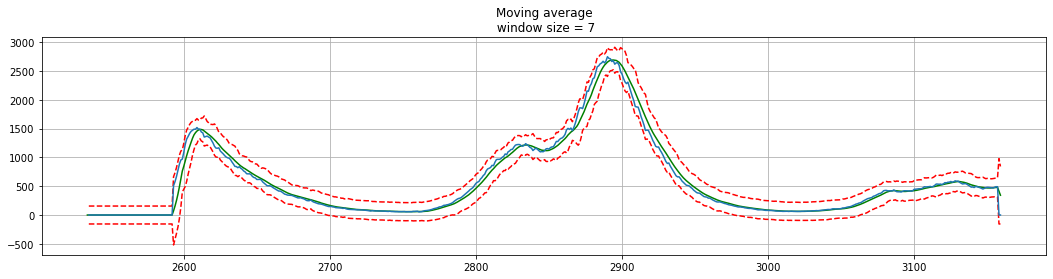

In [23]:
# Demonstrate the use of the function to plot moving averages
plot_moving_average(sample_ci.Hospitalised, window=7, plot_intervals=True, scale=1.96)

### Question 2:

The consultant performed a calculation that looks interesting, but the team is unsure about what the intention was and how to interpret the output. Can you offer some insights into the meaning of the code and output in the cell below? Is it useful?

In [9]:
# Return the top three days with biggest difference between daily value and rolling 7-day mean
s = sample_ci.copy()
s_rolling = s['Hospitalised'].rolling(window=7).mean()
s['error'] = mean_absolute_error(s['Hospitalised'][7:], s_rolling[7:])
s.sort_values('error', ascending=False).head(3)

#Looking at the code, it seems to be possibly trying to find peak hospitisation days that are not in line with rolling 7-day mean. 
#perhaps they are trying to find trends by assessing the dates with largest 'error' rate to see if this repeats over time
#this could perhaps be usefulf for future planning, resource, supplies etc if a pattern observed with days that do not align with the 7-day mean'norm'

,Province/State,Date,Hospitalised,error
2593,Channel Islands,2020-03-27,509.0,436.285714
2594,Channel Islands,2020-03-28,579.0,423.571429
2595,Channel Islands,2020-03-29,667.0,416.285714


### Question 3:

The management team had some additional questions around the project where they asked for further feedback to be included in your final presentation. Make sure to answer the questions in the Notebook in Markdown format in preparation for your presentation. The expectation is that you will provide short and direct responses to help them understand the importance and impact of the questions below.

> ***Note:*** You can double-click on the markdown cells to edit the text.

#### Question 3.1 (double click cell to edit)
- What is the difference between qualitative and quantitative data? How can these be used in business predictions?

Qualitative data is non-numerical in nature; answers to be given as yes or no, positive or negative. Quantitative data provides numerical information, and can be discrete or continuous data. Business can use qualitative data to assess customer satisfaction, e.g. "would you recommend us to a friend: Yes/No". Qualitative data (discrete) could be customer complaints e.g. the number of complaints each week. Quantitative data (continuous) could be on revenue generation daily/weekly. Together these different types of data assist in company performance, problem resoution, health of finances etc. 

#### Question 3.2 (double click cell to edit)
- Can you provide you observations around why continuous improvement is required, can we not just implement the project and move on to other pressing matters?

Continuous improvement is essential for businesses to grow, stay ahead of competitors and help nurture customer loyalty etc. Not addressing the root cause of problems can have a detrimental impact to business reputation, client/customer loyalty etc. Often small issues can be exacerbated as businesses grow. A continuous improvement mindsight is therefore needed as a driver for business health, reputation, staff engagement and customer retention. 

#### Question 3.3 (double click cell to edit)
- As a government, we adhere to all data protection requirements and have good governance in place. Does that mean we can ignore data ethics? We only work with aggregated data and therefore will not expose any personal details? (Provide an example of how data ethics could apply to this case; two or three sentences max)

Despite the fact that we are only working with aggregated data and unlikely to expose personal details, data integrity remains central to analytics. Mistakes are made in data (i.e. maybe some personal information is present through incorrect aggregation), or the data itself has biases from which the conclusions could be sensitive if shared widely. These factors alone mean that data ethics and good governance measures should remain at the forefront of the analysts mind.  